In [1]:
import requests
import networkx as nx
import pandas as pd

In [2]:
#get content in documents 
def get_content(url):
    r = requests.get(url)
    content = r.text
    return content

In [3]:
class Vertice:
    #vertice constructor
    def __init__(self, name):
        self.name = name 
        self.edges = []
        self.visited = False 
        
    #adding an edge 
    def add_edge(self, vertice):
        self.edges.append(vertice)
    
    #show the vertice 
    def __repr__(self):
        return f'{self.name}'
    

In [4]:
class Graph:
    #initialize the graph
    def __init__(self, name):
        self.vertices = {}
        self.name = name
        
    #adding a vertice
    def add_vertice(self, vertice):
        self.vertices[vertice] = Vertice(vertice)
        
        
    #creating an edge 
    def add_edge(self, vert1, vert2):
        vertice1 = self.vertices[vert1]
        vertice2 = self.vertices[vert2]
        vertice1.add_edge(vertice2)
        vertice2.add_edge(vertice1)
        
    #bfs search for graph
    def bfs(self, vertice):
        queue = []
        queue.append(self.vertices[vertice])
        
        while queue:
            vertice = queue.pop()
            
            for vert in vertice.edges:
                if vert.visited == False:
                    queue.append(vert)
                    vert.visited = True
    
    
    #importing info to dataframe
    def import_info(self):
        df = pd.DataFrame()
        i = 0
        for x in self.vertices:
            df.loc[i, 'Vertices'] = self.vertices[x]
            i = i + 1
        j = 0 
        for x in self.vertices:
            df.loc[j, 'Arestas'] = str(self.vertices[x].edges)
            j = j + 1
        f = open(self.name + '.csv', 'w')
        df.to_csv(f, header=True, index=False)
        f.close
    
#     #get info from csv file
    def show_info(self):
        graph_rep = pd.read_csv(self.name + '.csv')
        print(graph_rep)

        
    #show the adjacency list
    def __repr__(self):
        for _, vertice in self.vertices.items():
            print(f'{vertice.name}: {vertice.edges}')
        return ''

In [5]:
#show the graph 
def show(vertices, edges):
    G = nx.Graph()
    G.add_nodes_from(vertices)
        
    for edge in edges:
        G.add_edge(edge[0], edge[1])
        
    nx.draw(G, with_labels=True)

In [6]:
def test(url, name):
    #extracting data from url
    text = get_content(url)
    text = text.split('\r\n')
    text = text[1:]
    
    #getting vertices and edges from url text
    vertices = []
    edges = []
    for relation in text:
        list_ = relation.split(' ')
        vertices.append(list_[0])
        vertices.append(list_[2])
        edge = [list_[0], list_[2]]
        edges.append(edge)
    vertices = list(dict.fromkeys(vertices))
    
    #initializating the graph
    graph = Graph(name)
    
    #adding vertices to the graph
    for vertice in vertices:
        graph.add_vertice(vertice)
    
    #adding edges to the graph 
    for edge in edges:
        graph.add_edge(edge[0], edge[1])
    
    #calculating family numbers by bfs search
    conexos = 0
    
    for v in graph.vertices:
        if graph.vertices[v].visited == True:
            continue
        else:
            graph.bfs(v)
            conexos = conexos + 1 
    
    print('Numero de familias:\n')
    print(conexos)
    
    # import info into csv 
    graph.import_info()
    
    #showing the graph
    show(vertices, edges)
    
    #getting info from csv
    graph.show_info()


Numero de familias:

2
    Vertices                     Arestas
0      Pedro             [Maria, Josias]
1      Maria  [Pedro, Mangojata, Samuel]
2     Josias          [Pedro, Mangojata]
3  Mangojata      [Josias, Maria, Ivane]
4     Samuel              [Maria, Ivane]
5      Paulo                    [Marcos]
6     Marcos                     [Paulo]
7      Ivane         [Samuel, Mangojata]


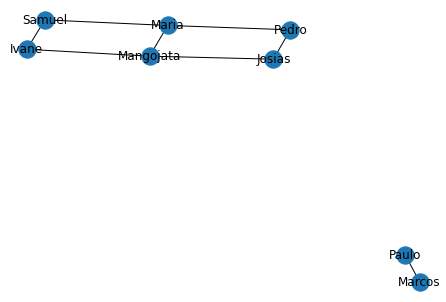

In [7]:
test('https://pastebin.com/raw/fa3ZNXtz', 'grafo1')

Numero de familias:

3
  Vertices           Arestas
0   Jose_1           [Maria]
1    Maria  [Jose_1, Sandra]
2   Josias         [Liboria]
3  Liboria   [Josias, Guapo]
4    Guapo         [Liboria]
5   Sandra   [Maria, Ivanir]
6    Paulo          [Jose_2]
7   Jose_2           [Paulo]
8   Ivanir          [Sandra]


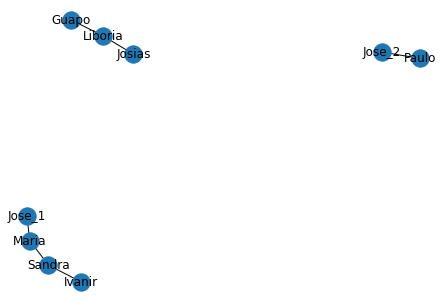

In [8]:
test('https://pastebin.com/raw/99PbjZr4', 'grafo2')